# Percentage predection of a student

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\hp\anaconda2\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Collecting the data 

In [53]:
# Sample dataset
data = {
    'Hours': [2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5, 3.3, 1.1, 8.9, 2.5, 1.9, 6.1,7.4,2.7,4.8,3.8,6.9,7.8],
    'Scores': [21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30, 24,67,69,3.,54,35,76,86]
}

In [54]:
#creating the DataFrame
df=pd.DataFrame(data)

# Preview of the data

In [55]:
# shape of the data
df.shape

(25, 2)

In [56]:
df.head()

,Hours,Scores
0,2.5,21.0
1,5.1,47.0
2,3.2,27.0
3,8.5,75.0
4,3.5,30.0


# information about the data

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     float64
dtypes: float64(2)
memory usage: 528.0 bytes


# Checking the missing values

In [58]:
# to check that whether any missing value is there or not
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Checking for the duplicated values

In [61]:
df.duplicated().sum()
#so there is no duplicate value in the dataset

0

In [62]:
# describing the data , statistical measure of the data
df.describe()

,Hours,Scores
count,25.000000,25.0000
mean,5.012000,50.4000
std,2.525094,26.7753
min,1.100000,3.0000
25%,2.700000,27.0000
50%,4.800000,47.0000
75%,7.400000,75.0000
max,9.200000,95.0000


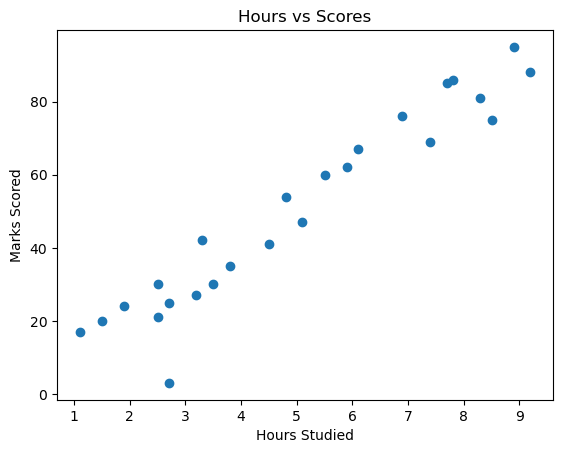

In [63]:
# Plot the data
plt.scatter(df['Hours'], df['Scores'])
plt.xlabel('Hours Studied')
plt.ylabel('Marks Scored')
plt.title('Hours vs Scores')
plt.show()

# Preparing the data in for predection 

In [64]:
# Split the data into features and target variable
X = df[['Hours']]
y = df['Scores']

In [65]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,Hours
9,2.7
13,3.3
1,5.1
22,3.8
5,1.5
2,3.2
12,4.5
15,8.9
3,8.5
4,3.5


C:\Users\hp\AppData\Local\Temp\ipykernel_16560\3282392819.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train)
C:\Users\hp\anaconda2\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


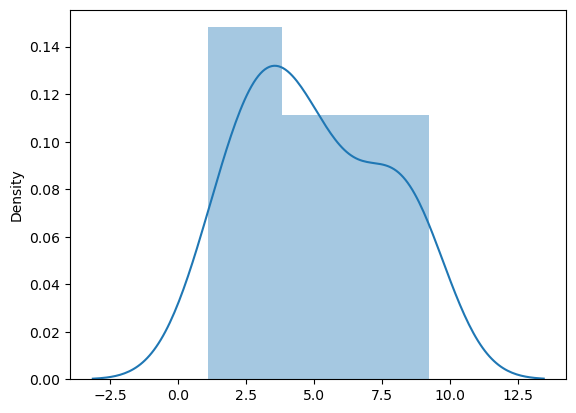

In [66]:
#ploting the dist plot without any transformation
sns.distplot(X_train)
plt.show()

# Training the Model( LinearRegression)

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
# here we are creating the object of linearRegression class
clf=LinearRegression()

In [69]:
# model training
clf.fit(X_train,y_train)

LinearRegression()

In [70]:
# prediction of the data
Y_pred=clf.predict(X_test)
Y_pred

array([83.46614692, 24.48301754, 24.48301754, 69.22883982, 59.05933476])

In [71]:
y_test

8     81.0
16    30.0
0     21.0
23    76.0
11    62.0
Name: Scores, dtype: float64

# Converting the test & predicted data into DataFrame

In [72]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': Y_pred}) 
data

,Actual,Predicted
8,81.0,83.466147
16,30.0,24.483018
0,21.0,24.483018
23,76.0,69.228840
11,62.0,59.059335


# Evaluating the model

In [73]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, Y_pred)) 

Mean Absolute Error: 4.235594465923254


# predicting the scores

In [74]:
# Predict the score for a student who studies 9.25 hours/day
hours = np.array([[9.25]])
predicted_score = clf.predict(hours)
print(f"Predicted score for a student who studies 9.25 hours/day: {predicted_score[0]:.2f}")

Predicted score for a student who studies 9.25 hours/day: 93.13


C:\Users\hp\anaconda2\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


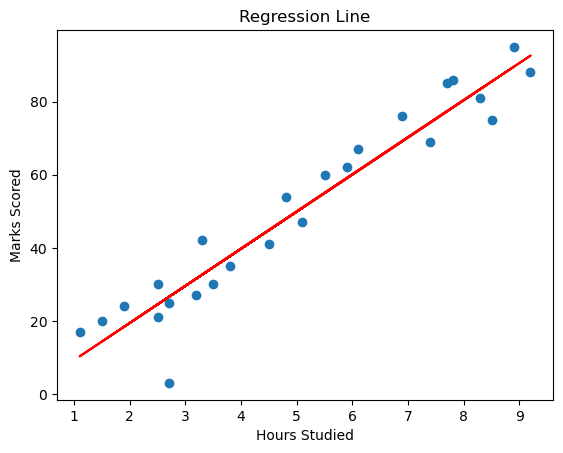

In [75]:
# Plot the regression line
plt.scatter(X, y)
plt.plot(X,clf.predict(X), color='red')
plt.xlabel('Hours Studied')
plt.ylabel('Marks Scored')
plt.title('Regression Line')
plt.show()